# Searching for Good Weights in a Linear Model


In [1]:
%load_ext autoreload
%autoreload 2

import banner

topics = ['Loading air quality data as pandas DataFrame.',
    'Extracting data we want from the DataFrame, into $X$ and $T$.',
    'A linear model',
    'Optimizing weights of linear model with manual guessing.',
    'Optimizing weights with Coordinate Descent',
    'Optimizing weights with Run and Twiddle',
    'Optimizing weights with Stochastic Gradient Descent',
    'Optimizing weights with AdamW',
    "Let's try a slightly nonlinear model"]

banner.reset(topics)



Topics in this Notebook

1. Loading air quality data as pandas DataFrame.
2. Extracting data we want from the DataFrame, into $X$ and $T$.
3. A linear model
4. Optimizing weights of linear model with manual guessing.
5. Optimizing weights with Coordinate Descent
6. Optimizing weights with Run and Twiddle
7. Optimizing weights with Stochastic Gradient Descent
8. Optimizing weights with AdamW
9. Let's try a slightly nonlinear model


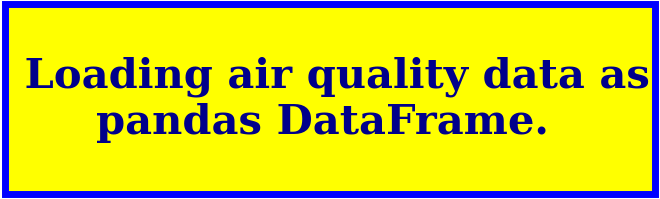

In [2]:
banner.next_topic()

# Loading air quality data as a pandas DataFrame.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas  # for reading csv file
from IPython.display import display, clear_output  # for animations later in this notebook

First, let's find and download some interesting data.  The [machine learning repository at the University of California, Irvine](http://archive.ics.uci.edu/ml), is a great resource for publicly available data with explanations for machine learning researchers.  Here we download the air quality data set.  If `curl` is not available on your system, you may use the above link to find and download this data.  It is useful to go the link and find the page describing this data set. That page is [here](http://archive.ics.uci.edu/ml/datasets/Air+quality).

In [4]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k    0 1507k    0     0  4558k      0 --:--:-- --:--:-- --:--:-- 4569k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


We will use the [pandas](https://pandas.pydata.org/) package to read this data.  The `pandas.read_csv` function is extremely useful for reading in all kinds of data with various peculiarities.  Here are the first few lines of `AirQualityUCI.csv`.

In [5]:
!head AirQualityUCI.csv

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;
10/03/2004;23.00.00;1,2;1197;38;4,7;750;89;1337;96;1393;949;11,2;59,2;0,7848;;
11/03/2004;00.00.00;1,2;1185;31;3,6;690;62;1462;77;1333;733;11,3;56,8;0,7603;;
11/03/2004;01.00.00;1;1136;31;3,3;672;62;1453;76;1333;730;10,7;60,0;0,7702;;
11/03/2004;02.00.00;0,9;1094;24;2,3;609;45;1579;60;1276;620;10,7;59,7;0,7648;;


Notice a few things.  Fields are separated by semi-colons.  The first line is names for each variable, appearing in separate columns.  Each row is one sample.  Each line ends with two semi-colons. Not immediately obvious is that the decimal values follow the European convention of using a comma instead of decimal point.  Not demonstrated in these first few lines is the fact that missing measurements are given the value -200.

All of these issues can be dealt with directly in the call to `pandas.read_csv`.  I don't mean to imply that I got this right on my first try.  The two most puzzling issues were the two semi-colons at the end of each line and the commas for decimal points.  The double semi-colons caused the data returned by `pandas.read_csv` to have more columns than I expected.

Very good pandas tutorials are available, such as [Pandas Illustrated: The Definitive Visual Guide to Panda](https://betterprogramming.pub/pandas-illustrated-the-definitive-visual-guide-to-pandas-c31fa921a43) by Lev Maximov, and [Pandas tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html).

In [6]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data.shape

(9471, 15)

In [7]:
np.where(data['Time'].isnull())

(array([9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367,
        9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378,
        9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389,
        9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400,
        9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411,
        9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422,
        9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433,
        9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444,
        9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455,
        9456, 9457, 9458, 9459, 9460, 9461, 9462, 9463, 9464, 9465, 9466,
        9467, 9468, 9469, 9470]),)

In [8]:
np.where(data['CO(GT)'].isnull())

(array([  10,   34,   39, ..., 9468, 9469, 9470]),)

In [9]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
data.shape

(827, 15)

In [10]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data.dropna(axis=0)
data.shape

(7674, 2)

So, we have 827 rows and 15 columns of data.  This means that we read 827 samples that do not have missing values, and each sample contains 15 values.  Let's look at the first few rows of this data matrix, called a `DataFrame` in `pandas`.

In [11]:
data.head(10)

,Time,CO(GT)
0,18.00.00,2.6
1,19.00.00,2.0
2,20.00.00,2.2
3,21.00.00,2.2
4,22.00.00,1.6
5,23.00.00,1.2
6,00.00.00,1.2
7,01.00.00,1.0
8,02.00.00,0.9
9,03.00.00,0.6


Let's create a simple problem for playing with this data.  Let's say we want to predict the level of carbon monoxide from the time of day.  The column `Time` contains the hour, but not just the hour.  9am will appear as 09.00.00.  Whoopee!  This will give us a chance to practice our skills at extracting substrings, converting strings to integers, and doing these steps for all of the `Time` values within a concise little list comprehension.  You don't know what this is?  Well, it is time to get comfortable not knowing, and typing 'python list comprehension' into your favorite web search engine.

In [12]:
data['Time'][:10]

0    18.00.00
1    19.00.00
2    20.00.00
3    21.00.00
4    22.00.00
5    23.00.00
6    00.00.00
7    01.00.00
8    02.00.00
9    03.00.00
Name: Time, dtype: object

In [13]:
[t for t in data['Time'][:10]]

['18.00.00',
 '19.00.00',
 '20.00.00',
 '21.00.00',
 '22.00.00',
 '23.00.00',
 '00.00.00',
 '01.00.00',
 '02.00.00',
 '03.00.00']

In [14]:
[t[:2] for t in data['Time'][:10]]

['18', '19', '20', '21', '22', '23', '00', '01', '02', '03']

In [15]:
[int(t[:2]) for t in data['Time'][:10]]

[18, 19, 20, 21, 22, 23, 0, 1, 2, 3]

In [16]:
hour = [int(t[:2]) for t in data['Time']]
len(hour)

7674

To get the carbon monoxide measurements for each sample, you can read the data description at the UCI web site to learn that column `CO(GT)` is the ground truth measurement of carbon monoxide.

In [17]:
data.columns

Index(['Time', 'CO(GT)'], dtype='object')

In [18]:
CO = data['CO(GT)']
CO[:10]

0    2.6
1    2.0
2    2.2
3    2.2
4    1.6
5    1.2
6    1.2
7    1.0
8    0.9
9    0.6
Name: CO(GT), dtype: float64

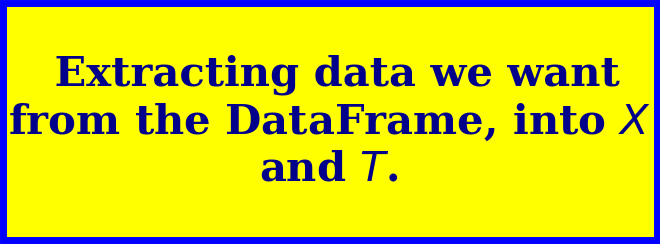

In [19]:
banner.next_topic()

# Extracting data we want from the DataFrame, into $X$ and $T$.

Here I will introduce a convention I will follow throughout this class.  Inputs to a model are given in a matrix named `X`.  Samples are in rows, and the components, measurements, variables, thingies of each sample are given in the columns.  The desired, correct outputs for each sample are given in a matrix named `T`, for **T**argets.  The $i^{th}$ row of `X` is Sample $i$ whose correct target output is in row $i$ of `T`.  Yes, you excellent software developers, `X` and `T` are parallel arrays, which should set of alarms in your coding brains.  As long as we remember that we cannot reorder the rows n `X` without doing the same reording of rows in `T`, we will be okay.

Let's set this up for our hour to CO problem.

In [20]:
T = CO
T = np.array(T).reshape((-1, 1))  # make T have one column and as many rows as needed to hold the values of T
Tnames = ['CO']

X = np.array(hour).reshape((-1, 1))
Xnames = ['Hour']

print('X.shape =', X.shape, 'Xnames =', Xnames, 'T.shape =', T.shape, 'Tnames =', Tnames)
# or, using the latest formatting ability in python strings,
print(f'{X.shape=} {Xnames=} {T.shape=} {Tnames=}')

X.shape = (7674, 1) Xnames = ['Hour'] T.shape = (7674, 1) Tnames = ['CO']
X.shape=(7674, 1) Xnames=['Hour'] T.shape=(7674, 1) Tnames=['CO']


Say after me...plot early and often!  We can never have too many visualizations.  This next plot verifies that we have defined `X` and `T` correctly.  What else do you notice?

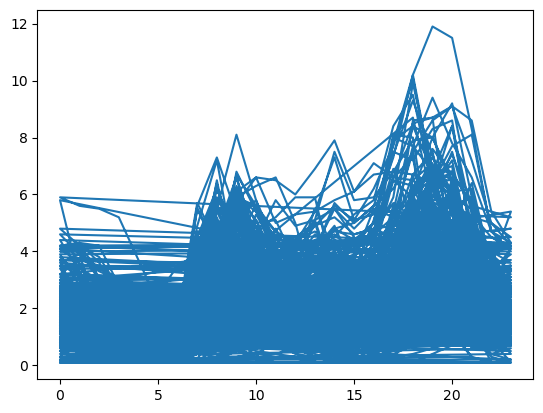

In [21]:
plt.plot(X, T)

Whoa!  That's a mess.  Why?

Let's just plot a circle marker on each data point. And, never, never, forget to label the $x$ and $y$ axes.

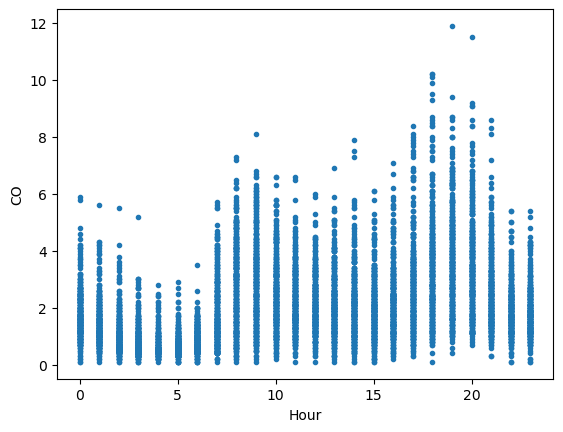

In [22]:
plt.plot(X, T, '.')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]);  # semi-colon here prevents printing the cryptic result of call to plt.ylabel()

Well, what do you think?  Will we be able to predict `CO` from `Hour` with a linear model?  The predictions of linear model must appear as a straight line in this plot.

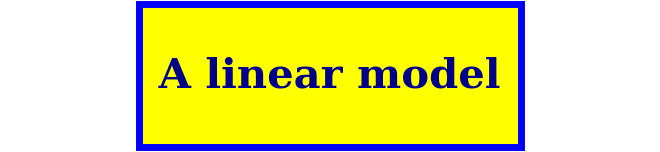

In [23]:
banner.next_topic()

# A linear model

What is a linear model?  

Well, a linear model of one variable is specified with a y-intercept and a slope.  These are the two parameters of the linear model.  Let's call them `w0` and `w1`.  If the output of the linear model is `y`, then we have `y = w0 + x * w1`.  Latex makes a nice mathy representation of this.

$$f(x) = w_0 + x\, w_1$$

Let's wrap this up in a little function.

In [24]:
def model(x, w0, w1):
    return w0 + x * w1

So, what values should we use for `w0` and `w1` to make a good prediction of `CO`?  What method shall we use to find good values?  How about good old guessing, or maybe we could call this trial and error.  We will just pick some values and plot the predictions.

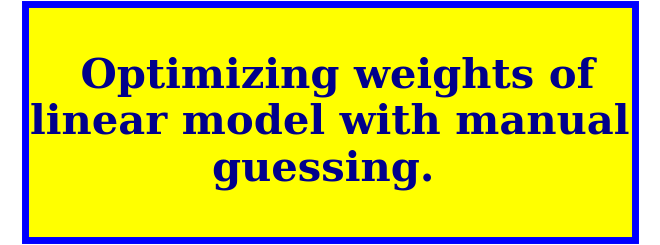

In [25]:
banner.next_topic()

# Optimizing weights of linear model with manual guessing

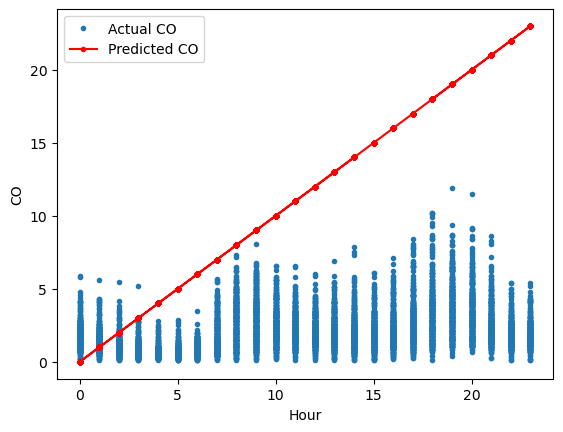

In [26]:
w0 = 0
w1 = 1

Y = model(X, w0, w1)

plt.plot(X, T, '.', label='Actual CO')
plt.plot(X, Y, 'r.-', label='Predicted CO')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])
plt.legend();  # make legend using the label strings

Well, clearly our predictions are climbing much too quickly  The slope, or `w1`, is too high.  Try a smaller value.

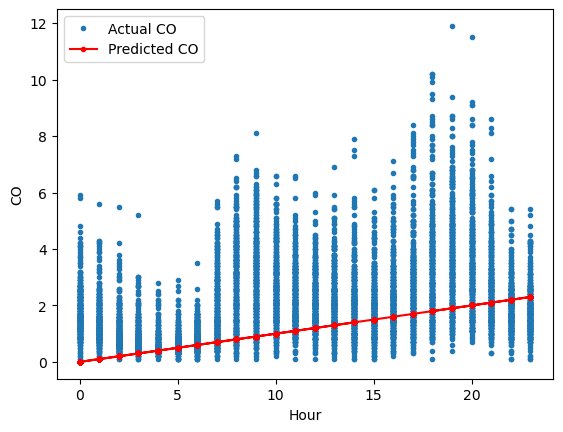

In [27]:
w1 = 0.1
Y = model(X, w0, w1)

plt.plot(X, T, '.', label='Actual CO')
plt.plot(X, Y, 'r.-', label='Predicted CO')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])
plt.legend(); 

Maybe too low.

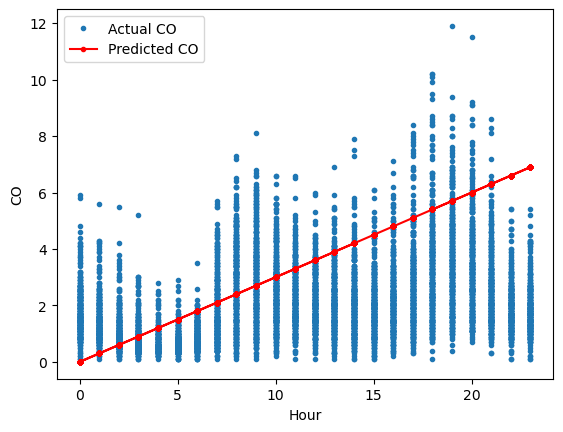

In [28]:
w1 = 0.3
Y = model(X, w0, w1)

plt.plot(X, T, '.', label='Actual CO')
plt.plot(X, Y, 'r.-', label='Predicted CO')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])
plt.legend(); 

Okay.  Now we can try to increase the y-intercept, `w0`, a bit.

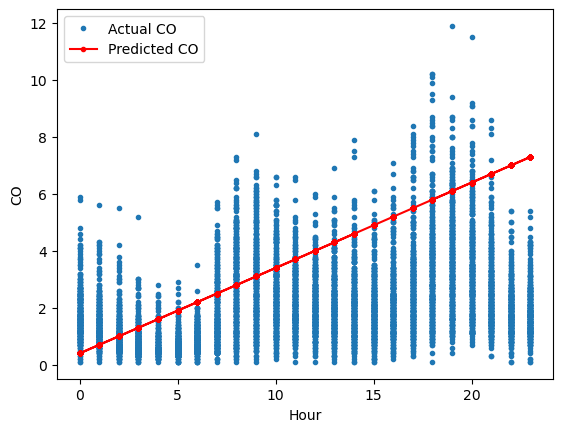

In [29]:
w0 = 0.4
Y = model(X, w0, w1)

plt.plot(X, T, '.', label='Actual CO')
plt.plot(X, Y, 'r.-', label='Predicted CO')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])
plt.legend(); 

We could do this all day.  (Well, maybe a few more times.)  

What we really need is a way to quantify how good our linear model is doing.  Let's define a function to calculate the error by calling `linear_model` to get our predictions, `Y`,  and compare them to the target `T` values.  The comparison will be done with the common root-mean-square-error, or RMSE, approach, for which the difference between `T` and `Y` is squared, averaged, and the square root of the result is returned.

In [30]:
def rmse(X, T, w0, w1):
    Y = model(X, w0, w1)
    return np.sqrt(np.mean((T - Y)**2))

Now we are ready to automate the guessing approach we attempted above.  Let's define a search algorithm that

   - bumps a weight up and down to determine which direction decreases the error,
   - repeatedly shift that weight in that direction until the error increases, and
   - repeat these steps with the other weight, and
   - repeat all steps multiple times.
   
This search algorithm is sometimes called [coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent).

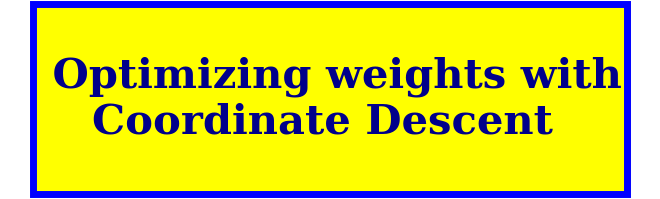

In [31]:
banner.next_topic()

# Optimizing weights with Coordinate Descent

First, let's modify `w0`.

In [32]:
w0 = 0.4   # Initial guess at weight values
w1 = 0.5

dw = 0.1   # How much to change a weight's value on each step.

current_error = rmse(X, T, w0, w1)
up_error = rmse(X, T, w0 + dw, w1)
down_error = rmse(X, T, w0 - dw, w1)

if down_error < current_error:
    dw = -dw
    new_error = down_error
else:
    new_error = up_error
    
while new_error <= current_error:
    current_error = new_error
    w0 = w0 + dw
    new_error = rmse(X, T, w0, w1)
    print(f'{w0=:5.2f} {new_error=:.5f}')

w0= 0.30 new_error=5.15276
w0= 0.20 new_error=5.07531
w0= 0.10 new_error=4.99866
w0= 0.00 new_error=4.92284
w0=-0.10 new_error=4.84791
w0=-0.20 new_error=4.77389
w0=-0.30 new_error=4.70084
w0=-0.40 new_error=4.62880
w0=-0.50 new_error=4.55780
w0=-0.60 new_error=4.48792
w0=-0.70 new_error=4.41919
w0=-0.80 new_error=4.35168
w0=-0.90 new_error=4.28543
w0=-1.00 new_error=4.22052
w0=-1.10 new_error=4.15699
w0=-1.20 new_error=4.09493
w0=-1.30 new_error=4.03439
w0=-1.40 new_error=3.97544
w0=-1.50 new_error=3.91816
w0=-1.60 new_error=3.86261
w0=-1.70 new_error=3.80889
w0=-1.80 new_error=3.75706
w0=-1.90 new_error=3.70720
w0=-2.00 new_error=3.65939
w0=-2.10 new_error=3.61372
w0=-2.20 new_error=3.57027
w0=-2.30 new_error=3.52911
w0=-2.40 new_error=3.49034
w0=-2.50 new_error=3.45403
w0=-2.60 new_error=3.42026
w0=-2.70 new_error=3.38910
w0=-2.80 new_error=3.36063
w0=-2.90 new_error=3.33492
w0=-3.00 new_error=3.31202
w0=-3.10 new_error=3.29201
w0=-3.20 new_error=3.27493
w0=-3.30 new_error=3.26083
w

Now let's modify $w_1$.

In [33]:
dw = 0.1
current_error = rmse(X, T, w0, w1)
up_error = rmse(X, T, w0, w1 + dw)
down_error = rmse(X, T, w0, w1 - dw)

if down_error < current_error:
    dw = -dw
    new_error = down_error
else:
    new_error = up_error
    
while new_error <= current_error:
    current_error = new_error
    w1 = w1 + dw
    new_error = rmse(X, T, w0, w1)
    print('w1 = {:.2f} new_error = {:.5f}'.format(w1, new_error))

w1 = 0.40 new_error = 2.91100
w1 = 0.30 new_error = 3.19097


Lot's of repeated code here.  We don't want to copy and paste for each iteration.  All steps are put together in the following function.  Let's collect the RMSE after each update in a list named `error_sequence`, and also the values of `w0` and `w1` after each update in list named `W_sequence`.

In [34]:
def coordinate_descent(error_f, X, T, w0, w1, dw, n_steps):
    
    step = 0
    current_error = error_f(X, T, w0, w1)
    error_sequence = [current_error]
    W_sequence = [[w0, w1]]
    changed = False

    while step < n_steps:

        step += 1
        
        if not changed:
            dw = dw * 0.1
            
        changed = False
        
        # Iteratively update w0, until no improvement.

        up_error = error_f(X, T, w0 + dw, w1)
        down_error = error_f(X, T, w0 - dw, w1)
        
        if down_error < current_error:
            dw = -dw
            
        while True:
            new_w0 = w0 + dw
            new_error = error_f(X, T, new_w0, w1)
            if new_error >= current_error or step > n_steps:
                break
            changed = True
            w0 = new_w0
            W_sequence.append([w0, w1])
            error_sequence.append(new_error)
            current_error = new_error
            step += 1

        # Now iteratively update w1, until no improvement.
        
        up_error = error_f(X, T, w0, w1 + dw)
        down_error = error_f(X, T, w0, w1 - dw)
        
        if down_error < current_error:
            dw = -dw
            
        while True:
            new_w1 = w1 + dw
            new_error = error_f(X, T, w0, new_w1)
            if new_error >= current_error or step > n_steps:
                break
            changed = True
            w1 = new_w1
            W_sequence.append([w0, w1])
            error_sequence.append(new_error)
            current_error = new_error
            step += 1

    # When nSteps have been taken, return the two weights and the two lists of sequences.
    return w0, w1, error_sequence, W_sequence

We will need some functions to help us create plots showing the error going down and the sequence of weight values that were tried. *Read through this code.  It will be very helpful to fully understand this code.*

In [35]:
def plot_sequence(error_sequence, W_sequence, label):
    plt.subplot(1, 2, 1)
    plt.plot(error_sequence, 'o-', label=label)
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.legend()
    plt.subplot(1, 2, 2)
    W_sequence = np.array(W_sequence)
    plt.plot(W_sequence[:, 0], W_sequence[:, 1], '.-', label=label)
    plot_error_surface()

def plot_error_surface():
    n = 20
    w0s = np.linspace(-5, 5, n) 
    w1s = np.linspace(-0.5, 1.0, n) 
    w0s, w1s = np.meshgrid(w0s, w1s)
    surface = []
    for w0i in range(n):
        for w1i in range(n):
            surface.append(rmse(X, T, w0s[w0i, w1i], w1s[w0i, w1i]))
    plt.contourf(w0s, w1s, np.array(surface).reshape((n, n)), cmap='bone')
    # plt.colorbar()
    plt.xlabel('w_bias')
    plt.ylabel('w')
    
def show_animation(model_f, error_sequence, W_sequence, X, T, label):
    W_sequence = np.array(W_sequence)
    fig = plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    error_line, = plt.plot([], [])
    plt.xlim(0, len(error_sequence))
    plt.ylim(0, max(error_sequence))

    plt.subplot(1, 3, 2)
    plot_error_surface()
 
    w_line, = plt.plot([], [], 'y.-', label=label)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    model_line, = plt.plot([], [], 'r-', lw=3, alpha=0.5, label=label)
    plt.xlim(0, 24)
    plt.ylim(np.min(T), np.max(T))

    for i in range(len(W_sequence)):
        
        error_line.set_data(range(i), error_sequence[:i])
        w_line.set_data(W_sequence[:i, 0], W_sequence[:i, 1])
        Y = model_f(X, W_sequence[i, 0], W_sequence[i, 1])
        model_line.set_data(X, Y)

        #plt.pause(0.001)

        clear_output(wait=True)
        display(fig)
    clear_output(wait=True)

Now let's try these functions to illustrate coordinate descent, given the initial values of `w0` and `w1`, and the parameter values that control the optimization, `nSteps` and `dw`.

In [36]:
w0 = -2
w1 = 0.5
n_steps = 200
dw = 10
w0, w1, error_sequence, W_sequence = coordinate_descent(rmse, X, T, w0, w1, dw, n_steps)
print(f'Coordinate Descent: Error is {rmse(X, T, w0, w1):.2f}   W is {w0:.2f}, {w1:.2f}')

Coordinate Descent: Error is 1.36   W is 1.10, 0.09


Well, did we succeed?   Hard to know from these three numbers.  Let's plot stuff to get a better understanding.

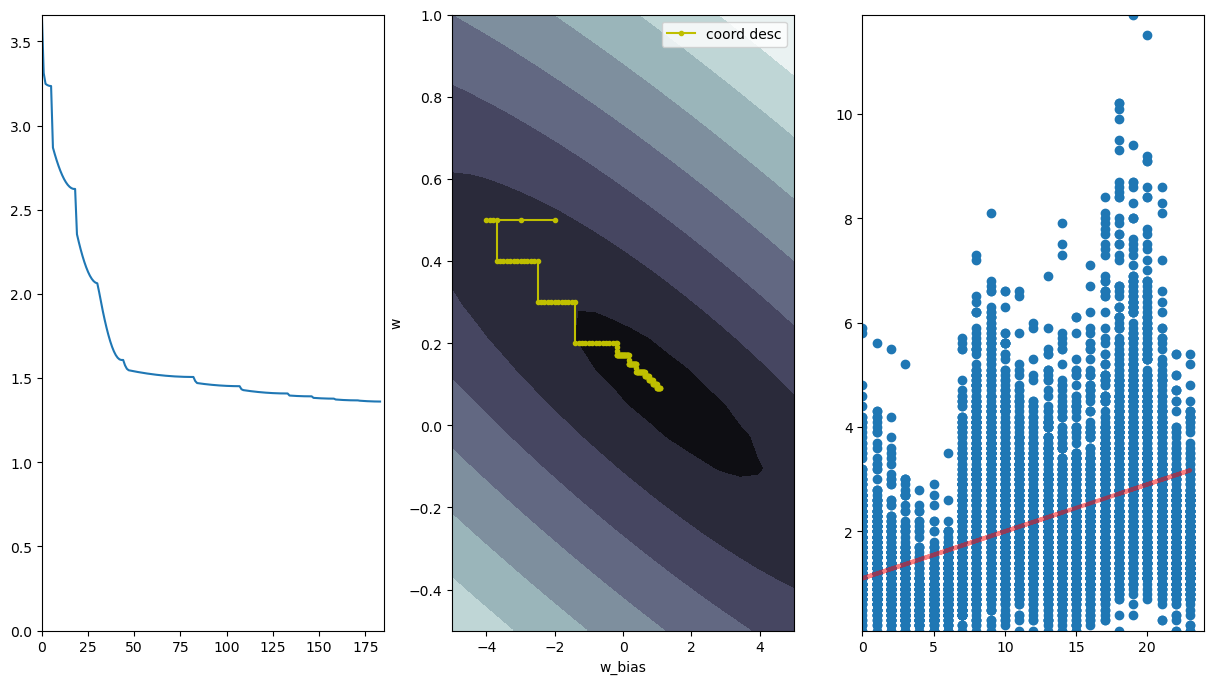

In [37]:
show_animation(model, error_sequence, W_sequence, X, T, 'coord desc')

Okay, well that's fun, but this becomes kind of silly when we try to apply this to other models that have more weights, like thousands, or millions.  Instead, we need a way to find a direction in which we can change both weights, meaning all weights, on each step.  

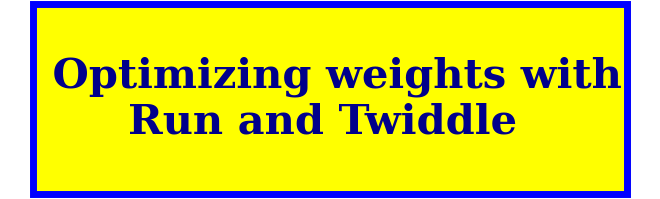

In [38]:
banner.next_topic()

# Optimizing weights with Run and Twiddle

How about this?  Take a step in some direction.  If error decreases, continue in that direction.  If error does not decrease, pick a random direction.  Repeat.

This has been called "run and twiddle", or "run and tumble".  [This Wikipedia page](https://en.wikipedia.org/wiki/Flagellum#Motor) describes how single cell organisms use cilia in their cell membranes to provide locomotion, either in the current direction as they move in a coordinated fashion, or to cause a spin to change direction.

Now we will be changing `wo` and `w1` together, so that we can step through the two-dimensional weight space in various directions.  Representing our two weights as a two-component vector, and rewriting some functions to accept a vector, simplifies the code a bit.  We will actually represent the weights, `W`, as a column matrix of two components.  It will look like

$$W =\begin{bmatrix} w_0  \\ w_1  \end{bmatrix}$$

Let's add a couple of functions to code the application of our model to data, and to calculate the RMSE that we wish to minimize.  Then we will modify a bit the plotting functions to accept the name of the model function.  We will use a different model towards the end of these notes.

First, a bit of math. Let
$$\begin{align*}
 X & =\begin{bmatrix} x_0 & x_1  \end{bmatrix} \\
  W & =\begin{bmatrix} w_0  \\ w_1  \end{bmatrix}
  \end{align*}
  $$
  
  The multiplication of the matrices $X$ and $W$, denoted as $X\;W$, performs
  $$ X\;W =  \begin{bmatrix} x_0 & x_1  \end{bmatrix} \;
  \begin{bmatrix} w_0  \\ w_1  \end{bmatrix} = 
 x_0 \; w_0 + x_1 \; w_1$$
  which is the dot product of the first row of $X$ with the first column of $W$. 
  
  Recall that $w_0$ is the y-intercept term of our linear model. So the above equations work if we guarantee that $x_0$ is always 1.  We can accomplish this by remembering to always insert a column of constant 1 values on the left of our $X$ matrix.

In [39]:
Z = np.array([[10, 11], [12, 13]])
Z

array([[10, 11],
       [12, 13]])

In [40]:
np.insert(Z, 0, 1, axis=1)

array([[ 1, 10, 11],
       [ 1, 12, 13]])

In [41]:
def model(X, W):
    X1 = np.insert(X, 0, 1, axis=1)
    return X1 @ W

def rmse(Y, T):
     return np.sqrt(np.mean((T - Y)**2))

In [42]:
def vector_length(v):
    return np.sqrt(v.T @ v)

def run_and_twiddle(model_f, rmse_f, X, T, W, dW, n_steps, verbose=False):
    step = 0
    Y = model_f(X, W)
    current_error = rmse_f(Y, T)
    error_sequence = [current_error]
    W_sequence = [W.flatten()]
    nFails = 0
    
    while step < n_steps:
        new_direction = np.random.uniform(-1, 1, size=(2, 1))
        if verbose:
            print(f'{step=} {nFails=} {new_direction=}')
        new_direction = dW * new_direction / vector_length(new_direction)
        
        if nFails > 10:
            dW = dW * 0.8
            
        while step < n_steps:
            new_W = W.copy() + new_direction               # Why call copy() here?
            Y = model_f(X, new_W)
            new_error = rmse_f(Y, T)
            step += 1
            if new_error >= current_error:
                nFails += 1
                break
            nFails = 0
            if verbose:
                print(f'good direction {new_direction=}')
            W = new_W
            W_sequence.append(W.flatten())
            error_sequence.append(new_error)
            current_error = new_error

    return W, error_sequence, W_sequence

In [43]:
def plot_error_surface(model_f):
    n = 20
    wbiass = np.linspace(-5, 5, n)
    ws = np.linspace(-0.5, 1.0, n)
    wbiass, ws = np.meshgrid(wbiass, ws)
    surface = []
    for wbi in range(n):
        for wi in range(n):
            W = np.array([wbiass[wbi, wi], ws[wbi, wi]]).reshape(-1, 1)
            Y = model_f(X, W)
            surface.append(rmse(Y, T))
    plt.contourf(wbiass, ws, np.array(surface).reshape((n, n)), cmap='bone')
    # plt.colorbar()
    plt.xlabel('w_bias')
    plt.ylabel('w')
    
def show_animation(model_f, error_sequence, W_sequence, X, T, label):
    W_sequence = np.array(W_sequence)
    fig = plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    error_line, = plt.plot([], [])
    plt.xlim(0, len(error_sequence))
    plt.ylim(0, max(error_sequence))

    plt.subplot(1, 3, 2)
    plot_error_surface(model_f)
 
    w_line, = plt.plot([], [], 'y.-', label=label)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    model_line, = plt.plot([], [], 'r-', lw=3, alpha=0.5, label=label)
    plt.xlim(0, 24)
    plt.ylim(np.min(T), np.max(T))

    for i in range(len(W_sequence)):
        
        error_line.set_data(range(i), error_sequence[:i])
        w_line.set_data(W_sequence[:i, 0], W_sequence[:i, 1])
        Y = model_f(X, W_sequence[i:i + 1, :].T)
        model_line.set_data(X, Y)

        # plt.pause(0.001)

        clear_output(wait=True)
        display(fig)
    clear_output(wait=True)

In [44]:
w0 = -2
w1 = 0.5
W = np.array([w0, w1]).reshape(-1, 1)

n_steps = 400
dW = 10

W, error_sequence, W_sequence = run_and_twiddle(model, rmse, X, T, W, dW, n_steps)
print('Run and Twiddle:  Error is {:.2f}   W is {:.2f}, {:.2f}'.format(rmse(model(X, W), T), W[0,0], W[1,0]))

Run and Twiddle:  Error is 1.36   W is 1.27, 0.08


In [45]:
X.shape, W.shape

((7674, 1), (2, 1))

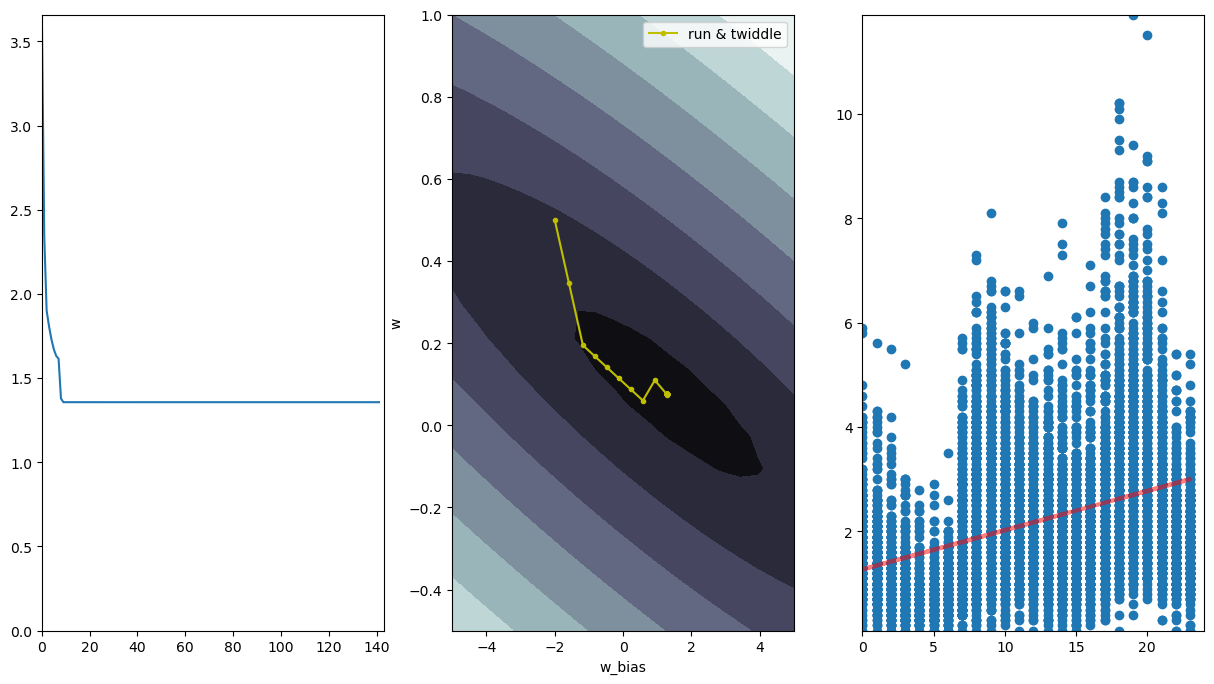

In [46]:
show_animation(model, error_sequence, W_sequence, X, T, 'run & twiddle')

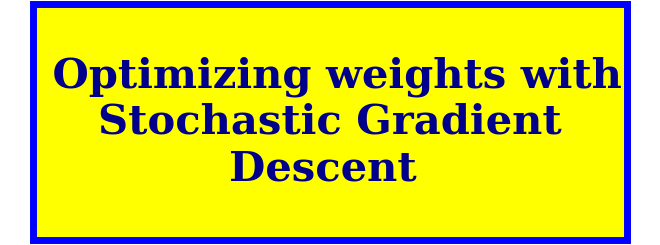

In [47]:
banner.next_topic()

# Optimizing weights with Stochastic Gradient Descent

Let's call the output of our model `Y` and the error being minimized `E`. 

To perform gradient descent, we need $\frac{\partial E}{\partial W}$.  Let's call this `dEdW`.  The calculation of this can be divided into two factors, using the chain rule. We will do this in more detail in the next lecture notebook.

$$\begin{align*}
  \frac{\partial E}{\partial W} &= \frac{\partial E}{\partial Y} \frac{\partial Y}{\partial W}
  \end{align*}$$
  
The error we want to minimize is the squared error, $(T - Y)^2$, and $Y =X W$, so

$$\begin{align*}
  \frac{\partial E}{\partial W} &= \frac{\partial E}{\partial Y} \frac{\partial Y}{\partial W} \\
  \frac{\partial E}{\partial W} &= \frac{\partial (T-Y)^2}{\partial Y} \frac{\partial X W}{\partial W} \\
  \frac{\partial E}{\partial W} &= -2 (T - Y) X 
    \end{align*}$$
    
In python, we have

    dYdW = X
    dEdY = -2 (T - Y)
    dEdW = dEdY.T @ dYdW   (Where did this .T come from?)
    
with some other subtle things to allow us to include the bias weight $w_0$ in the calculations.
    

In [48]:
# Gradient of Y with respect to W
def dYdW(X):
    # One row per sample in X, T.  One column per W component.
    # For first one, is constant 1.
    # For second one, is value of X
    return np.insert(X, 0, 1, axis=1)

#Gradient of E with respect to Y
def dEdY(Y, T):
    return -2 * (T - Y)
    
# Gradient of E with respect to W.
def dEdW(X, T, Y):
    result = dEdY(Y, T).T @ dYdW(X) / (X.shape[0])
    return result.T

Now we can define a function to optimize the weights using stochastic gradient descent. We will call this sgd, since this optimization method is often called SGD.

In [49]:
def sgd(model_f, dEdW_f, rmse_f, X, T, W, learning_rate, nSteps):
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        
        Y = model_f(X, W)
        error_sequence.append(rmse_f(Y, T))
        W_sequence.append(W.flatten())   # or W.ravel()
        
        W -= learning_rate * dEdW_f(X, T, Y)  # HERE IS THE WHOLE ALGORITHM!!
        
    return W, error_sequence, W_sequence

In [50]:
w0 = -2 
w1 = 0.5
W = np.array([w0, w1]).reshape(-1, 1)

nSteps = 200
learning_rate = 0.005

W, error_sequence, W_sequence = sgd(model, dEdW, rmse, X, T, W, learning_rate, nSteps)
print('Gradient Descent:  Error is {:.2f}   W is {}'.format(rmse(model(X, W), T), W))

Gradient Descent:  Error is 1.68   W is [[-0.69304845]
 [ 0.19966288]]


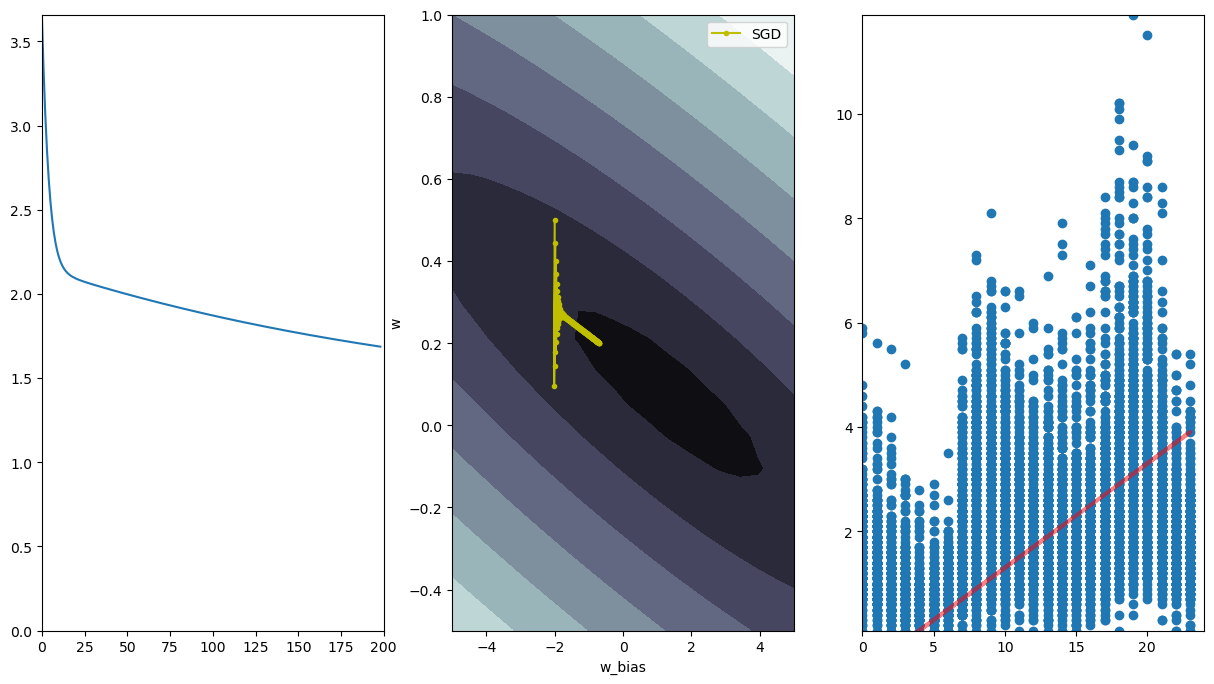

In [51]:
show_animation(model, error_sequence, W_sequence, X, T, 'SGD')

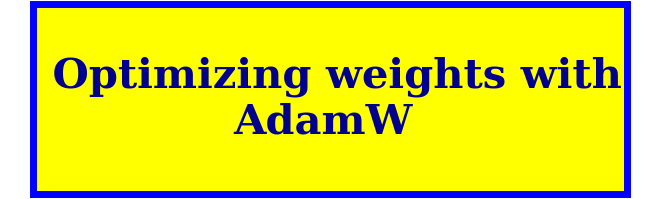

In [52]:
banner.next_topic()

# Optimizing weights with AdamW

Now let's try a recently developed variation of the gradient descent method, called Adam, for adaptive moment estimation.  See [ADAM: A Method for Stochastic Optimization](https://arxiv.org/pdf/1412.6980.pdf) by Diederik P. Kingma and Jimmy Lei Ba.

In [53]:
def adamw(model_f, dEdW_f, rmse_f, X, T, W, learning_rate, nSteps):
    
    # Commonly used parameter values
    alpha = learning_rate
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    W_decay_rate = 0.1   # set to zero for adam algorithm
    
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(nSteps):
        
        Y = model_f(X, W)
        error_sequence.append(rmse_f(Y, T))
        W_sequence.append(W.flatten())
        
        grad = dEdW_f(X, T, Y)
        
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad * grad

        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon) + W_decay_rate * W

    return W, error_sequence, W_sequence

In [54]:
w0 = -2
w1 = 0.5
W = np.array([w0, w1]).reshape(-1, 1)

nSteps = 200
learning_rate = 0.02

W, error_sequence, W_sequence = adamw(model, dEdW, rmse, X, T, W, learning_rate, nSteps)
print('Adam:  Error is {:.2f}   W is {:.2f}, {:.2f}'.format(rmse(model(X, W), T), W[0,0], W[1,0]))

Adam:  Error is 1.51   W is 0.16, 0.12


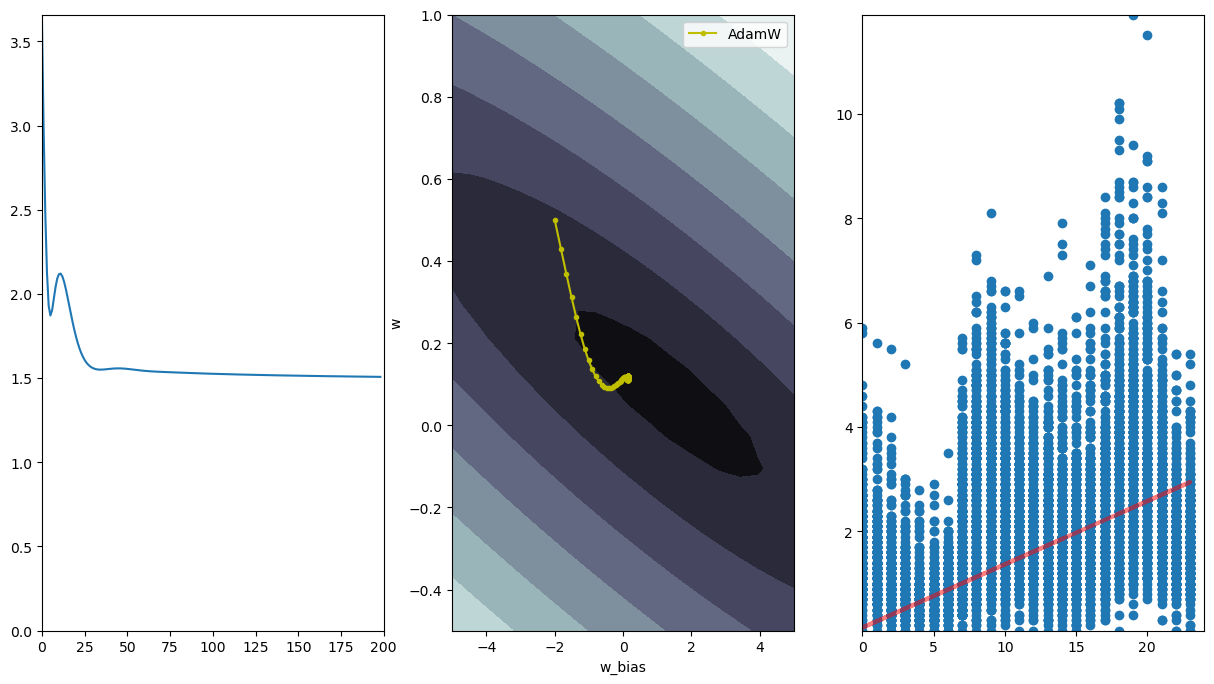

In [55]:
show_animation(model, error_sequence, W_sequence, X, T, 'AdamW')

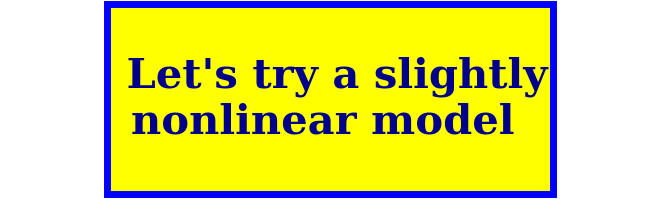

In [56]:
banner.next_topic()

# Let's Try a Slightly Nonlinear Model


Let's make a quadratic model now.  The equation for the output of this model for the $i^{th}$ sample is

$$ y_i = w_0 + w_1 x_i + w_2 x_i^2$$

In [57]:
X[:10]

array([[18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [ 0],
       [ 1],
       [ 2],
       [ 3]])

In [58]:
X[:10] ** 2

array([[324],
       [361],
       [400],
       [441],
       [484],
       [529],
       [  0],
       [  1],
       [  4],
       [  9]])

In [59]:
X[:10] ** [1, 2]

array([[ 18, 324],
       [ 19, 361],
       [ 20, 400],
       [ 21, 441],
       [ 22, 484],
       [ 23, 529],
       [  0,   0],
       [  1,   1],
       [  2,   4],
       [  3,   9]])

In [60]:
max_degree = 2

In [61]:
X[:10] ** [0, 1, 2]

array([[  1,  18, 324],
       [  1,  19, 361],
       [  1,  20, 400],
       [  1,  21, 441],
       [  1,  22, 484],
       [  1,  23, 529],
       [  1,   0,   0],
       [  1,   1,   1],
       [  1,   2,   4],
       [  1,   3,   9]])

In [62]:
range(max_degree)

range(0, 2)

In [63]:
list(range(max_degree))

[0, 1]

In [64]:
list(range(max_degree + 1))

[0, 1, 2]

In [65]:
X_powers = X ** range(1, max_degree + 1)
X_powers[:10]

array([[ 18, 324],
       [ 19, 361],
       [ 20, 400],
       [ 21, 441],
       [ 22, 484],
       [ 23, 529],
       [  0,   0],
       [  1,   1],
       [  2,   4],
       [  3,   9]])

So our $X$ matrix will consist of more than one variable input.  We still must prepend the column of constant 1's.  So our previous definitions of `model` and the gradient functions still work.

In [66]:
# def model(X, W):
#     X1 = np.insert(X, 0, 1, axis=1)
#     return X1 @ W
#
# def dYdW(X):
#     return np.insert(X, 0, 1, axis=1)
#
# def dEdY(Y, T):
#     return -2 * (T - Y)
#    
# def dEdW(X, T, Y):
#     result = dEdY(Y, T).T @ dYdW(X) / (X.shape[0])
#     return result.T

In [67]:
X

array([[18],
       [19],
       [20],
       ...,
       [12],
       [13],
       [14]])

In [68]:
X ** range(1, 3)

array([[ 18, 324],
       [ 19, 361],
       [ 20, 400],
       ...,
       [ 12, 144],
       [ 13, 169],
       [ 14, 196]])

In [69]:
max_degree = 2
X_powers = X ** range(1, max_degree + 1)

w0 = 0
ws_nonlinear = np.zeros(max_degree)

W = np.hstack((w0, *ws_nonlinear)).reshape(-1, 1)
print(f'{X_powers.shape=}, {W.shape=}')

learning_rate = 0.01
n_steps = 400

W, error_sequence, W_sequence = adamw(model, dEdW, rmse, X_powers, T, W, learning_rate, n_steps)
print(f'Adam:  Error is {rmse(model(X_powers, W), T):.2f}   W is {W}')

X_powers.shape=(7674, 2), W.shape=(3, 1)
Adam:  Error is 1.58   W is [[0.09284281]
 [0.0770167 ]
 [0.00329779]]


In [70]:
X_powers

array([[ 18, 324],
       [ 19, 361],
       [ 20, 400],
       ...,
       [ 12, 144],
       [ 13, 169],
       [ 14, 196]])

Demonstrate    debugging    here

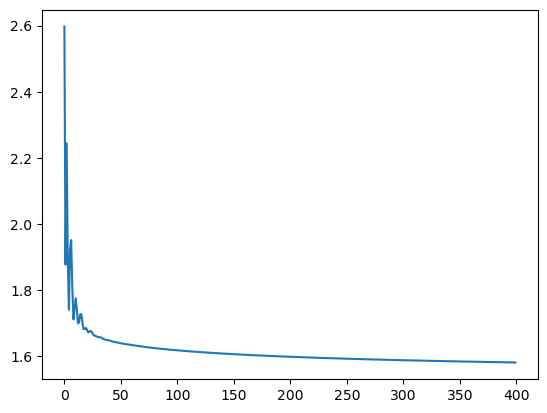

In [71]:
plt.plot(error_sequence);

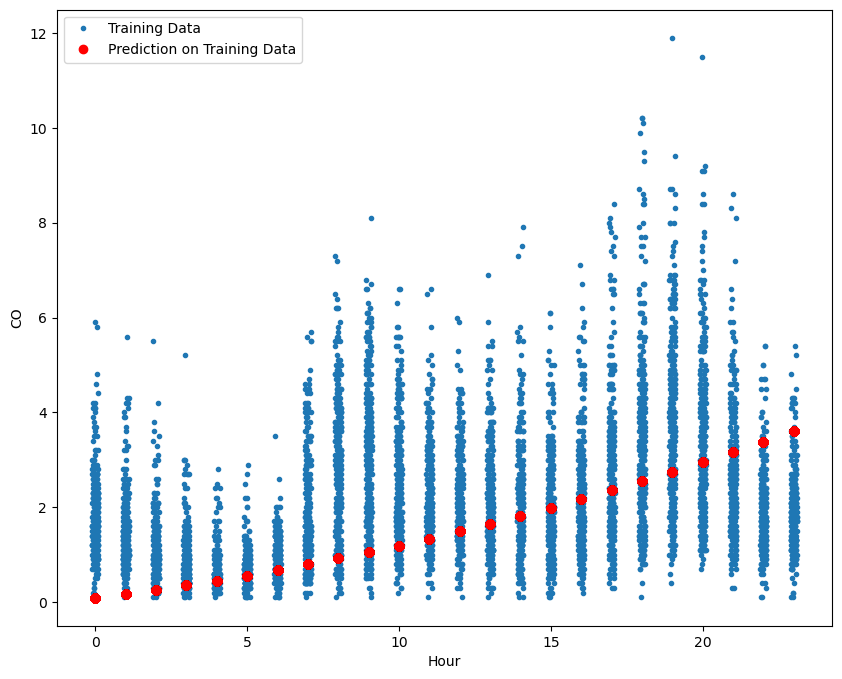

In [72]:
plt.figure(figsize=(10,8))
plt.plot(X + np.random.uniform(-0.1, 0.1, X.shape), T, '.', label='Training Data')

plt.plot(X, model(X_powers, W), 'ro', label='Prediction on Training Data')

plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])

plt.legend();

How would you change the previous code cell to plot a continuous red line?

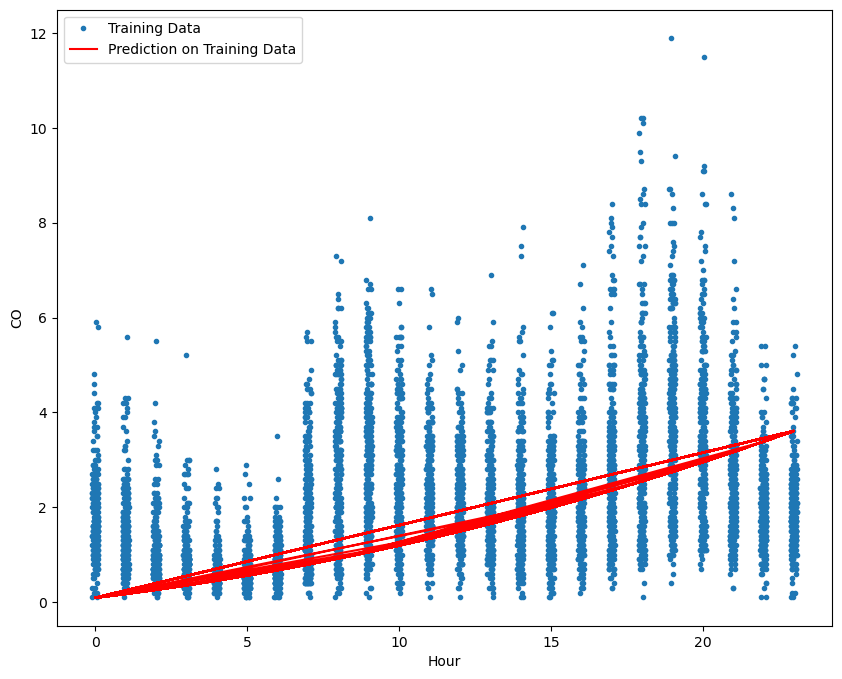

In [73]:
plt.figure(figsize=(10,8))
plt.plot(X + np.random.uniform(-0.1, 0.1, X.shape), T, '.', label='Training Data')

plt.plot(X, model(X_powers, W), 'r', label='Prediction on Training Data')
#   only change is here --------------------^
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])

plt.legend();

Whoops.

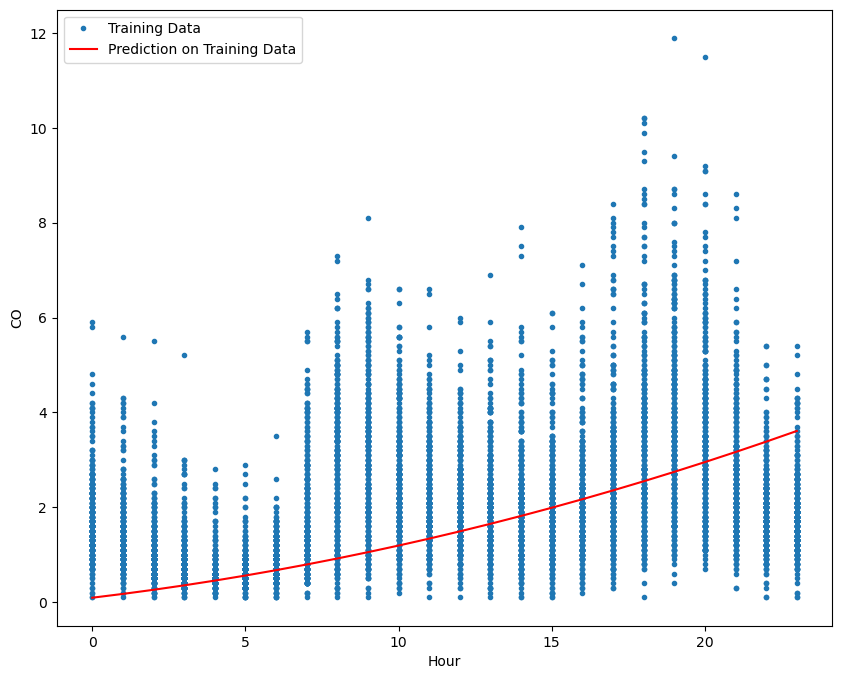

In [74]:
plt.figure(figsize=(10,8))
plt.plot(X, T, '.', label='Training Data')

order = np.argsort(X, axis=0).ravel()  # change to 1-dimensional vector
plt.plot(X[order], model(X_powers, W)[order], 'r', label='Prediction on Training Data')

plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])

plt.legend();

X_powers.shape=(7674, 3), W.shape=(4, 1)
Adam:  Error is 1.77   W is [[3.21050028e-02]
 [1.26960969e-02]
 [4.78605289e-03]
 [7.29277489e-05]]


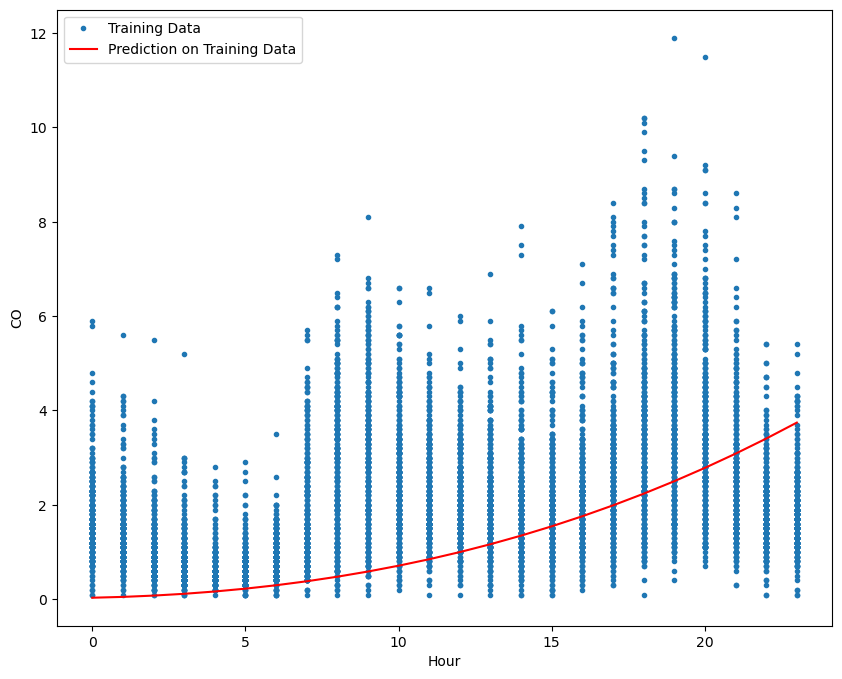

In [75]:
max_degree = 3
X_powers = X ** range(1, max_degree + 1)

w0 = 0
ws_nonlinear = np.zeros(max_degree)

W = np.hstack((w0, *ws_nonlinear)).reshape(-1, 1)
print(f'{X_powers.shape=}, {W.shape=}')

learning_rate = 0.01
n_steps = 400

W, error_sequence, W_sequence = adamw(model, dEdW, rmse, X_powers, T, W, learning_rate, n_steps)
print(f'Adam:  Error is {rmse(model(X_powers, W), T):.2f}   W is {W}')

plt.figure(figsize=(10,8))
plt.plot(X, T, '.', label='Training Data')

order = np.argsort(X, axis=0).ravel()  # change to 1-dimensional vector
plt.plot(X[order], model(X_powers, W)[order], 'r', label='Prediction on Training Data')

plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])

plt.legend();